https://github.com/jvns/pandas-cookbook

# Chapter 9:  Data Analysis

In this chapter you will learn how to read data from files, do some analysis and write the results to disk. Reading and writing files is quite an essential part of programming, as it is the first step for your program to communicate with the outside world. In most cases you will write programs that take data from some source, manipulates it in someway and writes it out somewhere. For example if you would write a survey, you could take input from participants and save their answers in some files. When the survey is over you would read these files in and do some analysis on the data you have collected and save your results.

## File In

Let's start by using the open() function to read some text from a file. The `open()` itself function does not return the actual text that is saved in the text file. It only returns a 'file object' from which we can read the content using the `.read()` function. We pass three arguments to the `open()` function:

 * the name of the file that you wish to open
 * the mode, a combination of characters, 'r' represents read-mode, and 't' represent plain text-mode. This indicates we are reading a plain text file.
 * the last argument, a named argument (encoding), specifies the encoding of the text file.
 
The most important mode arguments the open() function can take are:

* r: Opens a file for reading only. The file pointer is placed at the beginning of the file.
* w: Opens a file for writing only. Overwrites the file if the file exists. If the file does not exist, creates a new file for writing.
* a: Opens a file for appending. The file pointer is at the end of the file if the file exists. If the file does not exist, it creates a new file for writing. Use it if you would like to add something to the end of a file



The following example reads a file from disk. 

In [4]:
f = open('data/austen-emma-excerpt.txt', 'rt') # open the file 
text = f.read() # read in its content as a string
f.close() # close the file
print(text) # print the string

Emma by Jane Austen 1816

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


Reading an entire file in one string is not always desirable, especially not with huge files. The following example reads up until a newline everytime, and returns one line at a time. 


In [11]:
f = open('data/austen-emma-excerpt.txt','rt') # open the file
for line in f: # iterate over the file object
    print(line)   # the file object yields one line at a time
f.close() # close the file

Emma by Jane Austen 1816



VOLUME I



CHAPTER I





Emma Woodhouse, handsome, clever, and rich, with a comfortable home

and happy disposition, seemed to unite some of the best blessings

of existence; and had lived nearly twenty-one years in the world

with very little to distress or vex her.



She was the youngest of the two daughters of a most affectionate,

indulgent father; and had, in consequence of her sister's marriage,

been mistress of his house from a very early period.  Her mother

had died too long ago for her to have more than an indistinct

remembrance of her caresses; and her place had been supplied

by an excellent woman as governess, who had fallen little short

of a mother in affection.


Rather than just printing, we can of course do whatever we want with this file's content. Let's count the number of lines (but note, that a line does not necessarily correspond to a sentence).

In [2]:
count = 0
f = open('data/austen-emma-excerpt.txt', 'rt')
for line in f:
    count += 1
f.close()
print(count)

19


This is a "pythonic" way of opening a file. It is preferable to use this "with" syntax, you can read up on it why, but for now just remember that its safer.

In [4]:
with open('data/austen-emma-excerpt.txt','rt') as txt:
    for line in txt:
        print line

Emma by Jane Austen 1816



VOLUME I



CHAPTER I





Emma Woodhouse, handsome, clever, and rich, with a comfortable home

and happy disposition, seemed to unite some of the best blessings

of existence; and had lived nearly twenty-one years in the world

with very little to distress or vex her.



She was the youngest of the two daughters of a most affectionate,

indulgent father; and had, in consequence of her sister's marriage,

been mistress of his house from a very early period.  Her mother

had died too long ago for her to have more than an indistinct

remembrance of her caresses; and her place had been supplied

by an excellent woman as governess, who had fallen little short

of a mother in affection.


## Excersize

Read the file `data/austen-emma-excerpt.txt` and compute the average length of the lines:
* In characters
* In words
* Re-calculate both measures when not counting empty lines

In [5]:
f = open('data/austen-emma-excerpt.txt', 'rt')
# insert your code here
# important: always remember to properly close your files again!

## File Out

Now we mastered the art of reading files, let's move on to writing files, which follows a similar logic:

In [6]:
f = open('data/testoutput.txt', 'wt')
f.write("Hello world!")
f.close()

TypeError: 'encoding' is an invalid keyword argument for this function

If you want your data to be written on multiple lines, you need to take care to explicitly encode the newlines. 

In [7]:
f = open('data/testoutput.txt','wt', encoding='utf-8')
f.write("Hello world on the first line!\n")
f.write("Hello world on the second line!")
f.close()

TypeError: 'encoding' is an invalid keyword argument for this function

### Pickle

Another very common way of saving data to disk in Python is to just simply "dump" it in a pickle file. This section is going to walk you through thxis idea. 

Let's say you have read in some document and created a frequency dictionary from your text file:

In [12]:
freq_dict = {'word1': 210, 'word2': 50}
freq_dict

{'word1': 210, 'word2': 50}

You would like to remember this for later use. This is where you can use the pickle module. This module let's you write out arbitrary Python objects to disk and read them back later. pickle has two main methods: The first one is dump, which dumps an object to a file object and the second one is load, which loads an object from a file object

In [9]:
import pickle

In [10]:
pickle.dump(freq_dict, open('freqdict.pkl', 'wb')) # passing the thing that i want to right out and a file object to pickle

In [11]:
pickle.load(open(r'freqdict.pkl'))

{'word1': 210, 'word2': 50}

## From CSV to Visualization

Let's read the csv file using the simple open(r"file").readlines() method
This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [1]:
csvfile = open('./data/bikes.csv').readlines() # reading csv in a list 
print csvfile[:5]

# Printing it one line at a time until 10th line
for counter, row in enumerate(csvfile):
    if counter == 10:
        break
    else:
        print str(counter)+' -', row

['Date;Berri 1;Br\xe9beuf (donn\xe9es non disponibles);C\xf4te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn\xe9es non disponibles)\r\n', '01/01/2012;35;;0;38;51;26;10;16;\r\n', '02/01/2012;83;;1;68;153;53;6;43;\r\n', '03/01/2012;135;;2;104;248;89;3;58;\r\n', '04/01/2012;144;;1;116;318;111;8;61;\r\n']
0 - Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)

1 - 01/01/2012;35;;0;38;51;26;10;16;

2 - 02/01/2012;83;;1;68;153;53;6;43;

3 - 03/01/2012;135;;2;104;248;89;3;58;

4 - 04/01/2012;144;;1;116;318;111;8;61;

5 - 05/01/2012;197;;2;124;330;97;13;95;

6 - 06/01/2012;146;;0;98;244;86;4;75;

7 - 07/01/2012;98;;2;80;108;53;6;54;

8 - 08/01/2012;95;;1;62;98;64;11;63;

9 - 09/01/2012;244;;2;165;432;198;12;173;



In [4]:
import pandas as pd # "import as" statement
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)



You can read data from a CSV file using the read_csv function. By default, it assumes that the fields are comma-separated.
We're going to be looking some cyclist data from Montréal. Here's the original page (in French), but it's already included in this repository. We're using the data from 2012.
This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.


In [22]:
broken_df = pd.read_csv('./data/bikes.csv')
broken_df[:10]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;
5,06/01/2012;146;;0;98;244;86;4;75;
6,07/01/2012;98;;2;80;108;53;6;54;
7,08/01/2012;95;;1;62;98;64;11;63;
8,09/01/2012;244;;2;165;432;198;12;173;
9,10/01/2012;397;;3;238;563;275;18;241;


Note that to index the rows you can simply use the list syntax Dataframe[1] or Dataframe[:100].

In [18]:
df = pd.read_csv('./data/bikes.csv', sep=';',
                        encoding='latin1', 
                        parse_dates=['Date'],
                        dayfirst=True,
                        index_col='Date')
df[:10]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN
2012-01-06,146,NaN,0,98,244,86,4,75,NaN
2012-01-07,98,NaN,2,80,108,53,6,54,NaN
2012-01-08,95,NaN,1,62,98,64,11,63,NaN
2012-01-09,244,NaN,2,165,432,198,12,173,NaN


The funcktion Dataframe.columns() returns the names of the columns as a list and to select a column, we index with the name of the column, like this (somewhat similar to dictionary):

In [31]:
print df.columns
print df['Berri 1'][:5]

Index([u'Berri 1', u'Brébeuf (données non disponibles)', u'Côte-Sainte-Catherine', u'Maisonneuve 1', u'Maisonneuve 2', u'du Parc', u'Pierre-Dupuy', u'Rachel1', u'St-Urbain (données non disponibles)'], dtype='object')
Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
Name: Berri 1, dtype: int64


Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.


In [32]:
df[[df.columns[3], df.columns[5]]][:5]

,Maisonneuve 1,du Parc
Date,,
2012-01-01,38,26
2012-01-02,68,53
2012-01-03,104,89
2012-01-04,116,111
2012-01-05,124,97


Index([u'Berri 1', u'Brébeuf (données non disponibles)', u'Côte-Sainte-Catherine', u'Maisonneuve 1', u'Maisonneuve 2', u'du Parc', u'Pierre-Dupuy', u'Rachel1', u'St-Urbain (données non disponibles)', u'mean'], dtype='object')


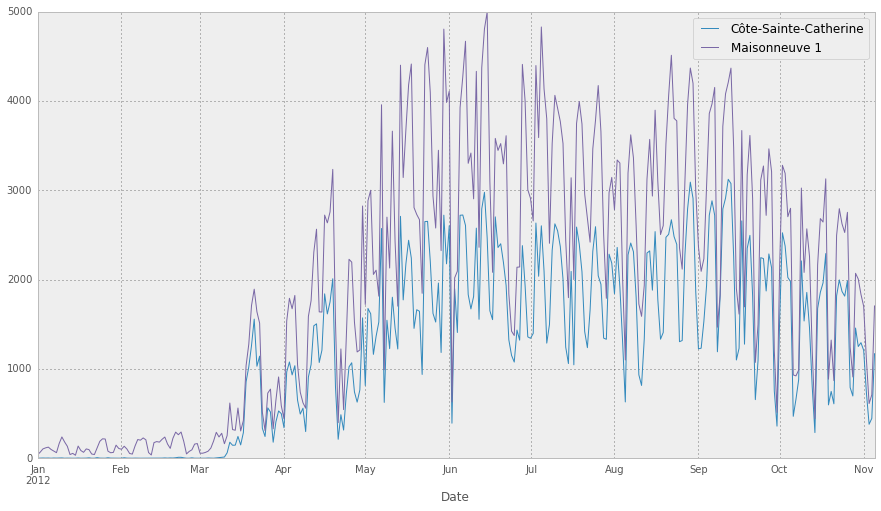

In [76]:
figsize(15, 8)
print df.columns
df[[df.columns[2], df.columns[3]]].plot()

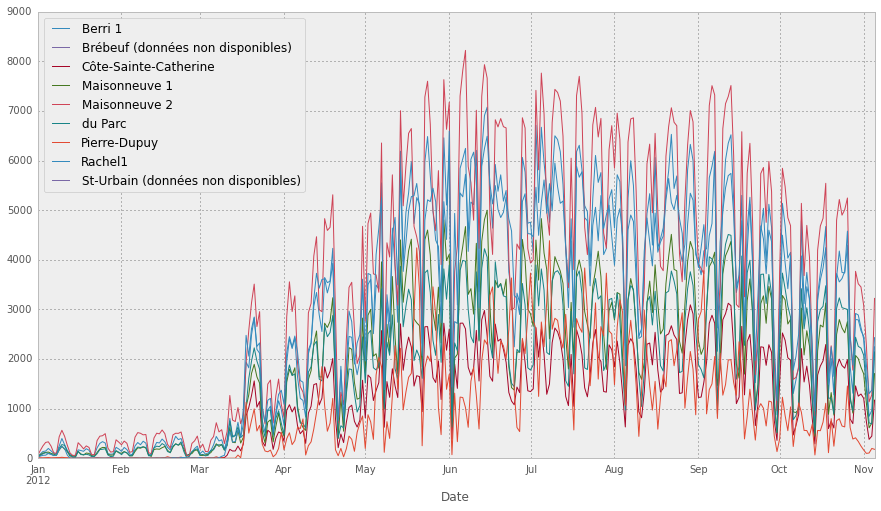

In [40]:
figsize(15, 8)
df.plot()

There seems to be a clear trend in the data. The "lines seems to be moving together" pointing to the fact that it is actually kind of predictable how much people are going to bike on bike lanes in general in certain times of the year. Just to show some additional functionality you can easily calculate the average accross all bike lanes.

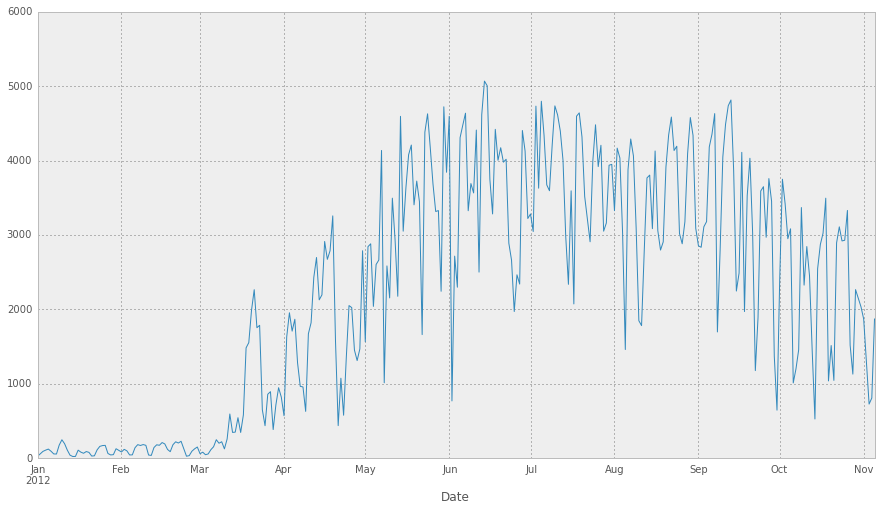

In [49]:
df.mean(axis=1).plot()

This is how you add the average as an extra column for you Dataframe.

In [63]:
df['mean'] = df.mean(axis=1)
df[:5]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),mean
Date,,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,25.142857
2012-01-02,83,NaN,1,68,153,53,6,43,NaN,58.142857
2012-01-03,135,NaN,2,104,248,89,3,58,NaN,91.285714
2012-01-04,144,NaN,1,116,318,111,8,61,NaN,108.428571
2012-01-05,197,NaN,2,124,330,97,13,95,NaN,122.571429


Which bike lane do people use most throughout the whole year?

In [67]:
# your code goes here